In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df_att = pd.read_csv("D:\Python\WebApp\MLC_Attendance_Eng_FInal_UTF8.csv")

In [3]:
print(df_att.size)

16668


#Data Frame Summary

In [4]:
df_att.describe()

,Date_Start,Date_End,Year,Attendance
count,926.000000,926.00000,926.000000,926.000000
mean,15.757019,15.75486,2017.514039,7.568035
std,8.732315,8.72346,2.352989,5.050364
min,1.000000,1.00000,2013.000000,0.000000
25%,8.000000,8.00000,2016.000000,4.000000
50%,16.000000,16.00000,2017.000000,7.000000
75%,23.000000,23.00000,2020.000000,10.000000
max,31.000000,31.00000,2022.000000,31.000000


In [5]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             926 non-null    object
 1   Status           926 non-null    object
 2   Type             926 non-null    object
 3   Creator          926 non-null    object
 4   Date             926 non-null    object
 5   Day_Start        926 non-null    object
 6   Day_End          926 non-null    object
 7   Month_Start      926 non-null    object
 8   Month_Finish     926 non-null    object
 9   Date_Start       926 non-null    int64 
 10  Date_End         926 non-null    int64 
 11  Year             926 non-null    int64 
 12  Time_Start       926 non-null    object
 13  Duration         926 non-null    object
 14  Location         926 non-null    object
 15  Going            926 non-null    object
 16  Attendance       926 non-null    int64 
 17  Date_Date_Excel  926 non-null    ob

#Change "Date_Date_Excel" to datetime + resummary

In [6]:
# Assuming your DataFrame is named df_att
df_att['Date_Date_Excel'] = pd.to_datetime(df_att['Date_Date_Excel'], format='%A, %B %d, %Y')

# Check the updated data types
print(df_att['Date_Date_Excel'].dtype)



datetime64[ns]


In [7]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             926 non-null    object        
 1   Status           926 non-null    object        
 2   Type             926 non-null    object        
 3   Creator          926 non-null    object        
 4   Date             926 non-null    object        
 5   Day_Start        926 non-null    object        
 6   Day_End          926 non-null    object        
 7   Month_Start      926 non-null    object        
 8   Month_Finish     926 non-null    object        
 9   Date_Start       926 non-null    int64         
 10  Date_End         926 non-null    int64         
 11  Year             926 non-null    int64         
 12  Time_Start       926 non-null    object        
 13  Duration         926 non-null    object        
 14  Location         926 non-null    object   

In [8]:
df_att.head()

,Name,Status,Type,Creator,Date,Day_Start,Day_End,Month_Start,Month_Finish,Date_Start,Date_End,Year,Time_Start,Duration,Location,Going,Attendance,Date_Date_Excel
0,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 2, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,2,2,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,7,2013-11-02
1,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 3, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,3,3,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,5,2013-11-03
2,Monday Practice,Completed,Team Practice,Eugene Arkhipov,"MONDAY, NOVEMBER 4, 2013 AT 12 PM UTC+03",MONDAY,MONDAY,NOVEMBER,November,4,4,2013,12:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,3,2013-11-04
3,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 9, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,9,9,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,2013-11-09
4,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 10, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,10,10,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,2013-11-10


#Event Statistics

##Totals

In [9]:
# Total count of events
total_events = df_att.shape[0]

# Count of events by Creator
events_by_creator = df_att['Creator'].value_counts()

# Count of different Status (Cancelled and Completed count)
status_counts = df_att['Status'].value_counts()

# Percent completed from all events
completed_percent = (status_counts['Completed'] / total_events) * 100

# Count of different Type (Team Practice, etc)
type_counts = df_att['Type'].value_counts()

# Count of different elements in the Name column
name_counts = df_att['Name'].value_counts()

# Count of events by Location
location_counts = df_att['Location'].value_counts()

In [10]:
# Print the results
print("Total count of events:", total_events)
print("Count of events by Creator:")
print(events_by_creator)


Total count of events: 926
Count of events by Creator:
Eugene Arkhipov           630
Artur Ventsel             287
Zombies Cup                 3
Gus Peters                  1
Sofia Ninjas Lacrosse       1
Budapest New Years Cup      1
Moscow Lacrosse Club        1
Rhinocup - Lacrosse         1
Lisboa Lacrosse Cup         1
Name: Creator, dtype: int64


##Count of Status

In [11]:

print("Count of different Status:")
print(status_counts)
print("Percent completed from all events:", completed_percent, "%")


Count of different Status:
Completed    919
Cancelled      7
Name: Status, dtype: int64
Percent completed from all events: 99.24406047516199 %


##Count of Type

In [12]:

print("Count of different Type:")
print(type_counts)


Count of different Type:
Team Practice                  562
Skills Practice                258
Tournament                      25
Intra-Squad Game                19
Championship                    13
Theory                          13
Conditioning                    11
Clinic                           7
Administrative Function          4
Clinic/Game/Marketing Event      4
Team Building                    4
Stringing                        4
Training Camp                    2
Name: Type, dtype: int64


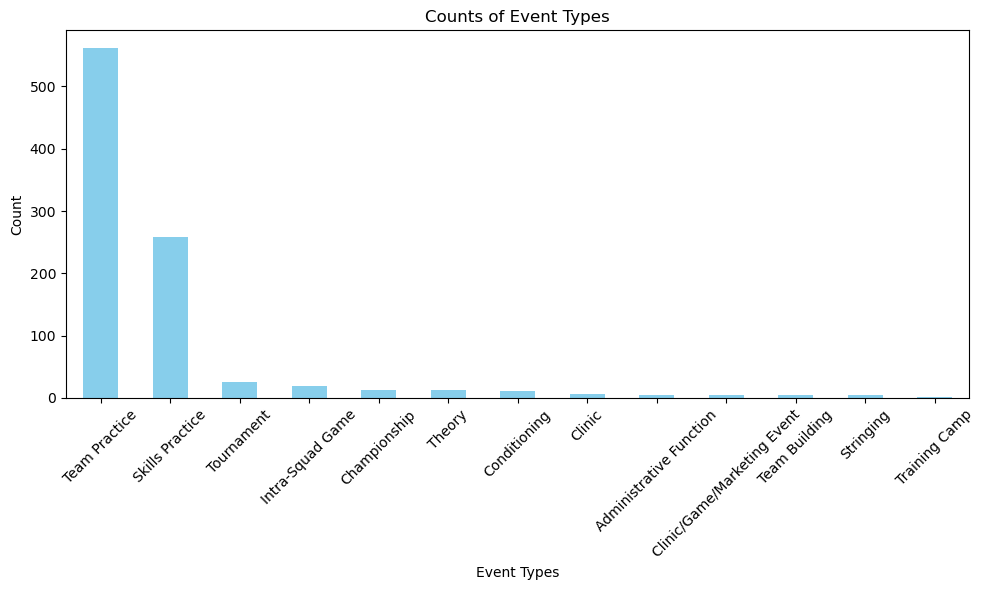

In [13]:
# Assuming you have the 'type_counts' Series
type_counts = df_att['Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Event Types')
plt.xlabel('Event Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


##Count of event Name

In [14]:
print("Count of different elements in the Name column:")
print(name_counts)

Count of different elements in the Name column:
Академия Лакросса                       258
Тренировка в воскресенье                 63
Тренировка (суб вечер)                   59
Saturday Practice                        56
Тренировка на поляне                     54
                                       ... 
Тренировка в субботу на Васильевской      1
Тренировка в пятницу на Динамо            1
The Early Frost                           1
The Northern War                          1
Сбор документов                           1
Name: Name, Length: 167, dtype: int64


##Count of events by Location

In [15]:
print("Count of events by Location:")
print(location_counts)

Count of events by Location:
ул. васильевская 5                                         292
Ул. Рогова, 12к1                                           157
Шереметьевская улица 29, Москва, Россия, 127521            156
ул, добролюбова д.2 стр. 3                                  70
ул. Флотская, 11а, москва                                   47
                                                          ... 
ул. Мясницкая, д.17, стр. 2                                  1
Mechelsbroekstraat 4a, 2820 Bonheiden, Belgium               1
Лиговский Пр. 246                                            1
Лиственничная аллея, д. 12/2                                 1
Krasnaya Presnya St, 24, стр. 1, Moskva, Russia, 123557      1
Name: Location, Length: 69, dtype: int64


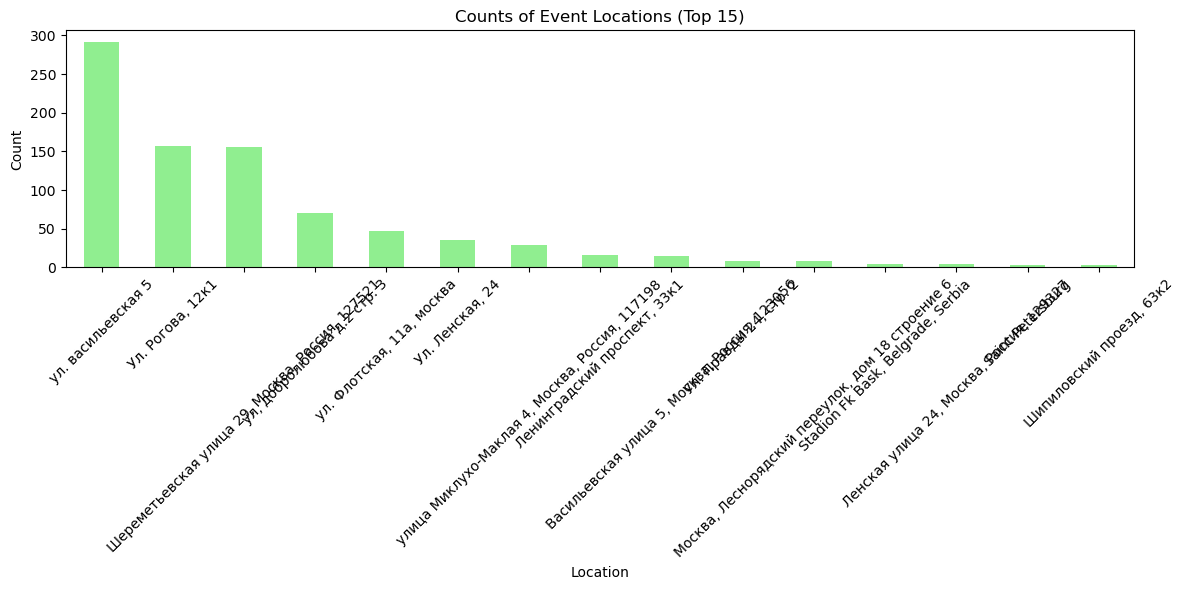

In [16]:
# Assuming you have the 'location_counts' Series
location_counts = df_att['Location'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
location_counts[:15].plot(kind='bar', color='lightgreen')  # Display the top 15 locations for better readability
plt.title('Counts of Event Locations (Top 15)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



###Top 10 counts of event locations

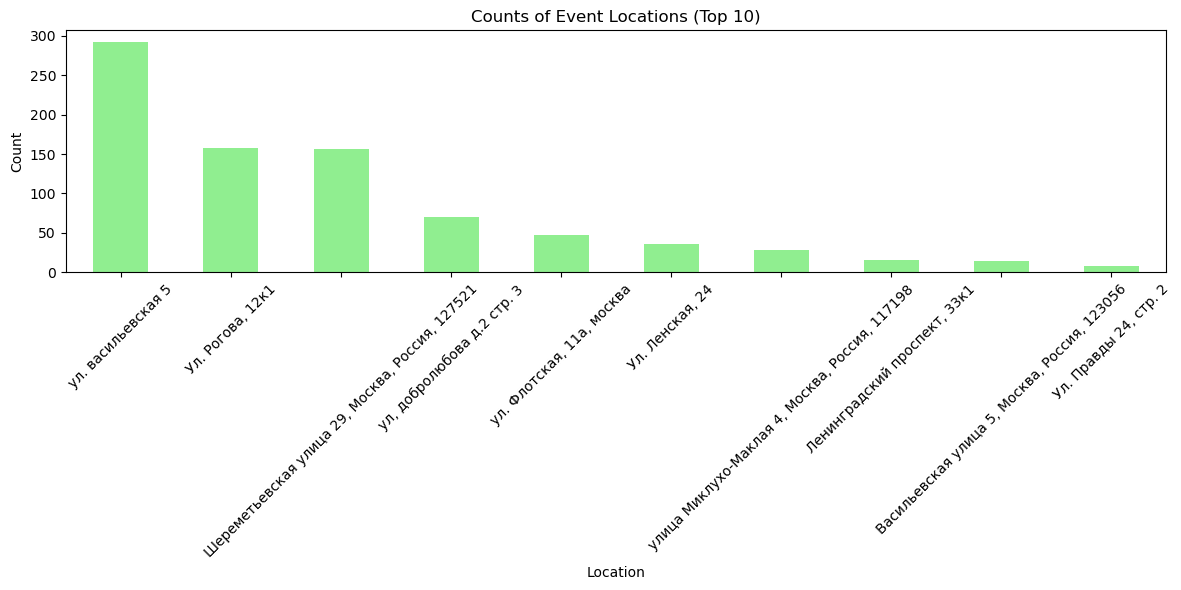

In [17]:
# Assuming you have the 'location_counts' Series
location_counts = df_att['Location'].value_counts()

# Create a bar plot for the top 10 locations
plt.figure(figsize=(12, 6))
location_counts[:10].plot(kind='bar', color='lightgreen')  # Display the top 10 locations
plt.title('Counts of Event Locations (Top 10)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#List of Attendees

In [18]:
all_attendees = df_att['Going'].str.split(', ').explode()

# Count the number of attendees
attendees_count = all_attendees.value_counts()

# Print the list of all attendees and their counts
print("List of all attendees and their counts:")
print(attendees_count)

List of all attendees and their counts:
Eugene Arkhipov                                                      699
Artur Ventsel                                                        397
Vladislav Vereschagin                                                333
Artem Denisov                                                        242
Valeo Sosnov                                                         216
                                                                    ... 
73 people responded Going                                              1
15 people responded Going                                              1
Alisa Tsvetkova                                                        1
Даря Воршева                                                           1
Practice is cancelled\nWe are just retrubation... along with time      1
Name: Going, Length: 176, dtype: int64


##List of attendees of all events top 20

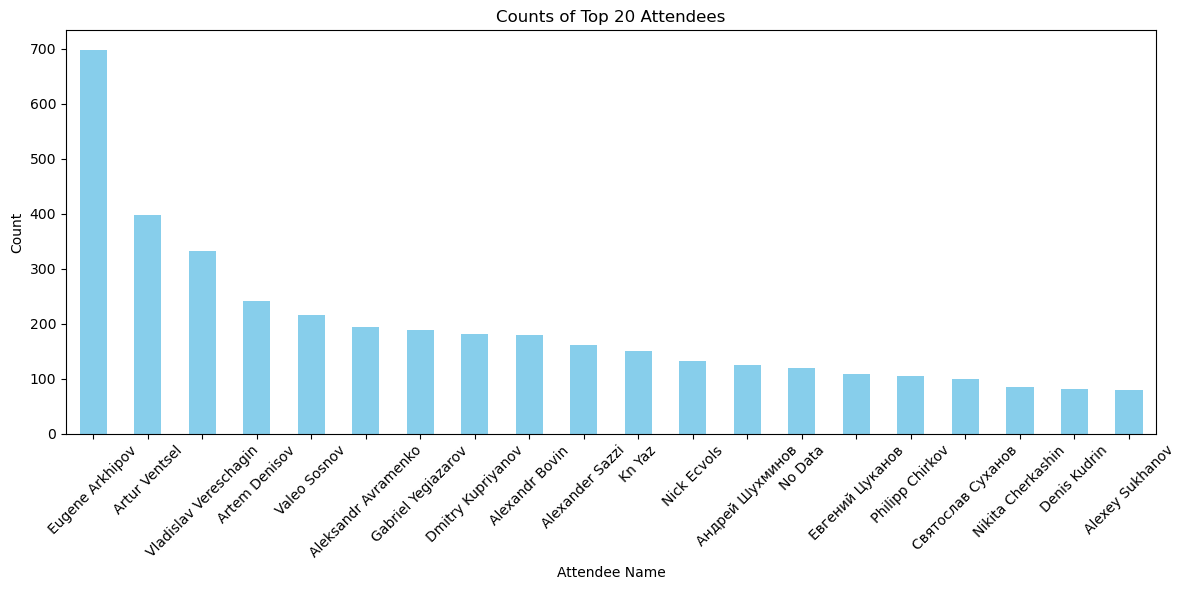

In [19]:
# Assuming you have the 'attendees_count' Series
attendees_count = all_attendees.value_counts()

# Create a bar plot for the top 20 attendees
plt.figure(figsize=(12, 6))
attendees_count[:20].plot(kind='bar', color='skyblue')  # Display the top 20 attendees
plt.title('Counts of Top 20 Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


###List of Attendees of team practices/skills practice

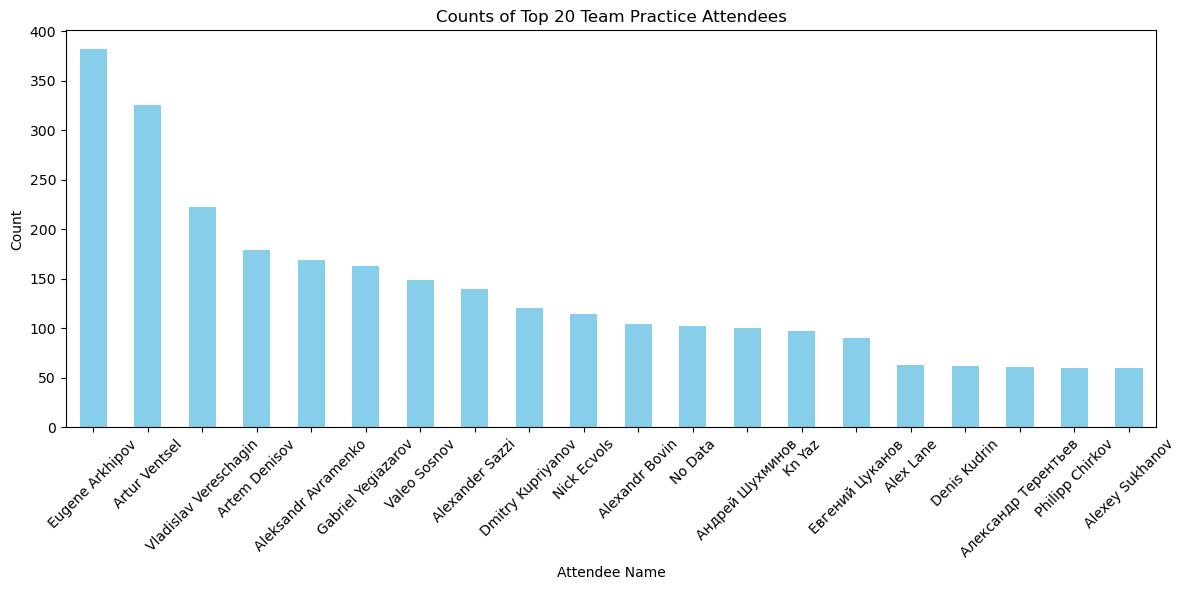

In [20]:
# Filter the DataFrame for 'Team Practice'
team_practice_df = df_att[df_att['Type'] == 'Team Practice']

# Explode and count attendees
team_practice_attendees = team_practice_df['Going'].str.split(', ').explode()
team_practice_attendees_count = team_practice_attendees.value_counts()

# Create a bar plot for the top 20 attendees of 'Team Practice'
plt.figure(figsize=(12, 6))
team_practice_attendees_count[:20].plot(kind='bar', color='skyblue')
plt.title('Counts of Top 20 Team Practice Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


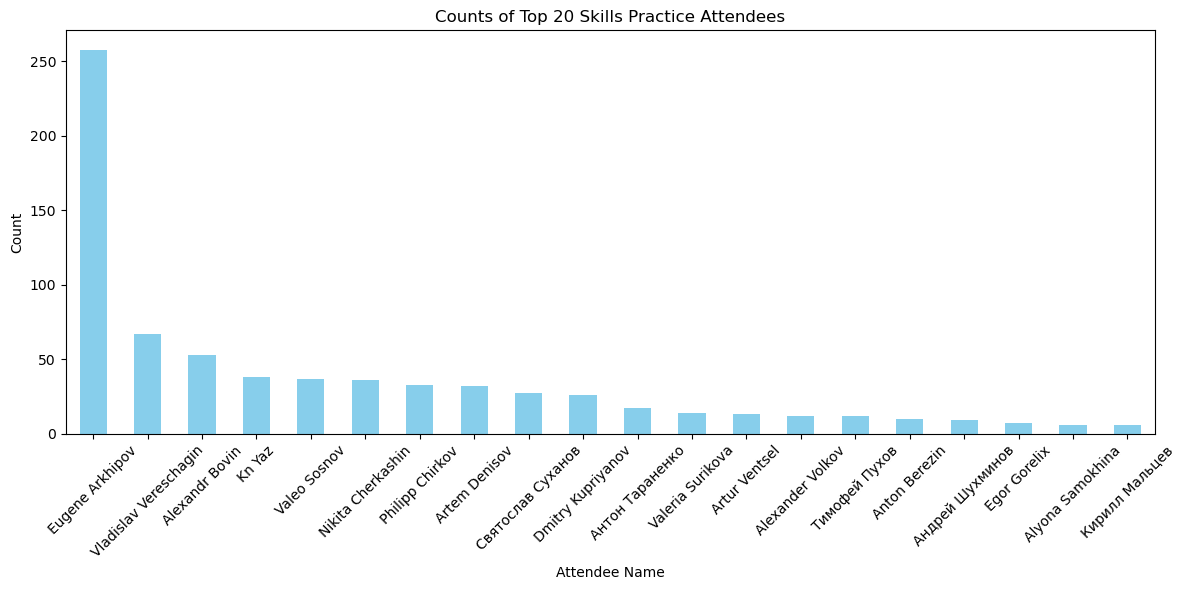

In [21]:
# Filter the DataFrame for 'Skills Practice'
skills_practice_df = df_att[df_att['Type'] == 'Skills Practice']

# Explode and count attendees
skills_practice_attendees = skills_practice_df['Going'].str.split(', ').explode()
skills_practice_attendees_count = skills_practice_attendees.value_counts()

# Create a bar plot for the top 20 attendees of 'Skills Practice'
plt.figure(figsize=(12, 6))
skills_practice_attendees_count[:20].plot(kind='bar', color='skyblue')
plt.title('Counts of Top 20 Skills Practice Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
unique_all_attendees = set(all_attendees)
print("Unique values in all_attendees:")
for attendee in unique_all_attendees:
    print(attendee)

Unique values in all_attendees:
Boroda Serhio
Ее Ее
Rowan Staden-Coats
Muhammad Ibrahim
Daniil Vlasenko
Надежда Обрезкова
София Гастин
Cole Russon
180 people responded Going
Andrey Mineev
Stephen Hnery
Сергей Леонов
Konstantin Kologriev
50 people responded Going
Nikolay Efimov
Konstantin Kravtsov
Kirill Bazylev
Даниил Хромов
Vladislav Vereschagin
Aaron Luo
Александр Терентьев
Aleksandr Avramenko
Alex Lane
2 people responded Going
4 people responded Going
Gio Mushukia
Ivan Borodin
Eugene Arkhipov
Лев Щуклинов
Leonid Belokopytov
Юрий Гибизти
Philipp Chirkov
Dmitriy Khamin
Alexander Sazzi
Gleb Global-Nomad
Vitaly Dubinin
No Data
Anton Podgorny
Павел Багаев
Gabriel Yegiazarov
Анастасия Кухтерина
Тимофей Пухов
80 people responded Going
Алексей Чернышов
109 people responded Going
Followed by 15 people
Артём Червоный
Иван Лысов
Artem Smirnov
Egor Gorelix
Ruslan Romanov
Татьяна Стародубова
Jack Stubbs
Alexandr Litoy
Tony Fernandes
Kirill Potekhin
22 people responded Going
Valeria Surikova
Vlad

In [23]:
print(len(unique_all_attendees))

176


##List of filtered Attendees

In [24]:
filtered_attendees = [attendee for attendee in all_attendees if attendee != "No Data" and len(attendee.split()) == 2]
unique_attendees = list(set(filtered_attendees))
print("Unique attendees with 2 words:")
for attendee in unique_attendees:
    print(attendee)


Unique attendees with 2 words:
Boroda Serhio
Ее Ее
Rowan Staden-Coats
Muhammad Ibrahim
Daniil Vlasenko
Надежда Обрезкова
София Гастин
Cole Russon
Andrey Mineev
Stephen Hnery
Сергей Леонов
Konstantin Kologriev
Nikolay Efimov
Konstantin Kravtsov
Kirill Bazylev
Даниил Хромов
Vladislav Vereschagin
Aaron Luo
Александр Терентьев
Aleksandr Avramenko
Alex Lane
Gio Mushukia
Ivan Borodin
Eugene Arkhipov
Лев Щуклинов
Leonid Belokopytov
Юрий Гибизти
Philipp Chirkov
Dmitriy Khamin
Alexander Sazzi
Gleb Global-Nomad
Vitaly Dubinin
Anton Podgorny
Павел Багаев
Gabriel Yegiazarov
Анастасия Кухтерина
Тимофей Пухов
Алексей Чернышов
Артём Червоный
Иван Лысов
Artem Smirnov
Egor Gorelix
Ruslan Romanov
Татьяна Стародубова
Jack Stubbs
Alexandr Litoy
Tony Fernandes
Kirill Potekhin
Valeria Surikova
Vladimir Yerakhtorin
Kn Yaz
John Watson
Serg Prikhodko
Alexander Zarubin
Elizaveta Larina
Podoshva-Zakharov Nikolay
Anton Berezin
Irina Krez
Даниил Шевченко
Evgen Soltys
Alex Ilmenyov
Valeriy Severukhin
Athen Fuller
V

In [25]:
unique_attendees_count = len(unique_attendees)
print("Count of unique attendees with 2 words:", unique_attendees_count)


Count of unique attendees with 2 words: 148


#Eugene Stats

In [26]:
# Create a new DataFrame containing only the rows where Eugene Arkhipov appears in the Going column
eugene_attendee_df = df_att[df_att['Going'].str.contains('Eugene Arkhipov', na=False)]


In [27]:
print(eugene_attendee_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 131 to 925
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             699 non-null    object        
 1   Status           699 non-null    object        
 2   Type             699 non-null    object        
 3   Creator          699 non-null    object        
 4   Date             699 non-null    object        
 5   Day_Start        699 non-null    object        
 6   Day_End          699 non-null    object        
 7   Month_Start      699 non-null    object        
 8   Month_Finish     699 non-null    object        
 9   Date_Start       699 non-null    int64         
 10  Date_End         699 non-null    int64         
 11  Year             699 non-null    int64         
 12  Time_Start       699 non-null    object        
 13  Duration         699 non-null    object        
 14  Location         699 non-null    object 

In [28]:

# Find the first and last date Eugene Arkhipov attended an event
first_date = eugene_attendee_df['Date_Date_Excel'].min()
last_date = eugene_attendee_df['Date_Date_Excel'].max()



In [29]:
print(first_date)
print(last_date)

2015-05-23 00:00:00
2022-03-19 00:00:00


In [30]:
from dateutil.relativedelta import relativedelta

# Create a new DataFrame containing only the rows within the date range of Eugene Arkhipov's attendance
eugene_time_period_df = df_att[(df_att['Date_Date_Excel'] >= first_date) & (df_att['Date_Date_Excel'] <= last_date)]

# Count the number of events Eugene Arkhipov attended in that time period
events_attended = len(eugene_attendee_df)

# Count the total number of events in the time period
total_events_in_time_period = len(eugene_time_period_df)

# Calculate the percentage of events attended by Eugene Arkhipov
percentage_attended = (events_attended / total_events_in_time_period) * 100

# Assuming you have `first_date` and `last_date` as datetime objects
delta = relativedelta(last_date, first_date)

print(f"Eugene Arkhipov attended {events_attended} events")
print(f"{percentage_attended:.2f}% of total events")
print(f"from {first_date} to {last_date}.")
print(f"He was available to practice for {delta.years} Years, {delta.months} Months, and {delta.days} Days from 2015 to 2022")


Eugene Arkhipov attended 699 events
87.92% of total events
from 2015-05-23 00:00:00 to 2022-03-19 00:00:00.
He was available to practice for 6 Years, 9 Months, and 24 Days from 2015 to 2022


#Time Statistics

In [31]:
all_durations = df_att['Duration']

print(all_durations)

0             Duration: 3 hr
1             Duration: 3 hr
2             Duration: 3 hr
3             Duration: 3 hr
4             Duration: 3 hr
               ...          
921    Duration: 1 hr 30 min
922    Duration: 1 hr 30 min
923    Duration: 1 hr 30 min
924    Duration: 1 hr 30 min
925    Duration: 1 hr 30 min
Name: Duration, Length: 926, dtype: object


In [32]:
# Assuming you already have your DataFrame
unique_durations = df_att['Duration'].unique()

# Print the unique values
print(unique_durations)


['Duration: 3 hr' 'Duration: 2 hr' 'Duration: 2 days' 'Duration: 6 hr'
 'Duration: 4 hr' 'Duration: 3 days' 'Duration: 5 hr'
 'Duration: 1 hr 50 min' 'Duration: 3 hr 30 min' 'Duration: 2 hr 30 min'
 'Duration: 1 hr 30 min' 'Duration: 7 hr' 'Duration: 9 hr'
 'Duration: 8 hr' 'Duration: 1 hr 20 min' 'Duration: 4 days'
 'Duration: 8 hr 30 min' 'Duration: 1 hr' 'Duration: 4 hr 30 min'
 'Duration: 1 hr 59 min']


In [33]:
# Sample duration values from all rows
durations = all_durations

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration
print(f"Total Duration: {total_hours} hr {remaining_minutes} min")


Total Duration: 3454 hr 39 min


##Events over Time

###Events per Year

In [34]:
events_per_year = df_att['Year'].value_counts().sort_index()


# Print the total number of events per year
print("Total Events per Year:")
print(events_per_year)


Total Events per Year:
2013     17
2014     83
2015    100
2016    167
2017    137
2018     94
2019     67
2020    125
2021    123
2022     13
Name: Year, dtype: int64


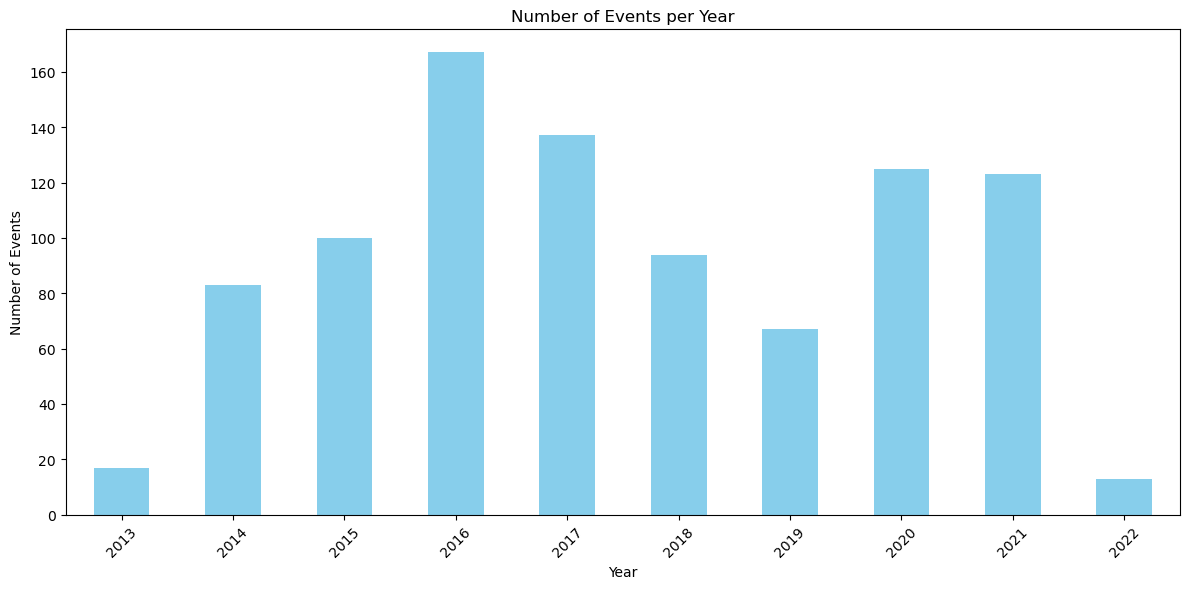

In [35]:
# Sort the values by year
events_per_year = df_att['Year'].value_counts().sort_index()

# Create a bar plot for events per year
plt.figure(figsize=(12, 6))
events_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Events per year + average events per week

In [36]:

# Calculate events per week and add it as a new column
events_per_year = events_per_year.reset_index()
events_per_year.columns = ['Year', 'Total Events']
events_per_year['Events per Week'] = events_per_year['Total Events'] / 52

# Print the DataFrame to see the new column
print("Total Events per Year:")
print(events_per_year)


Total Events per Year:
   Year  Total Events  Events per Week
0  2013            17         0.326923
1  2014            83         1.596154
2  2015           100         1.923077
3  2016           167         3.211538
4  2017           137         2.634615
5  2018            94         1.807692
6  2019            67         1.288462
7  2020           125         2.403846
8  2021           123         2.365385
9  2022            13         0.250000


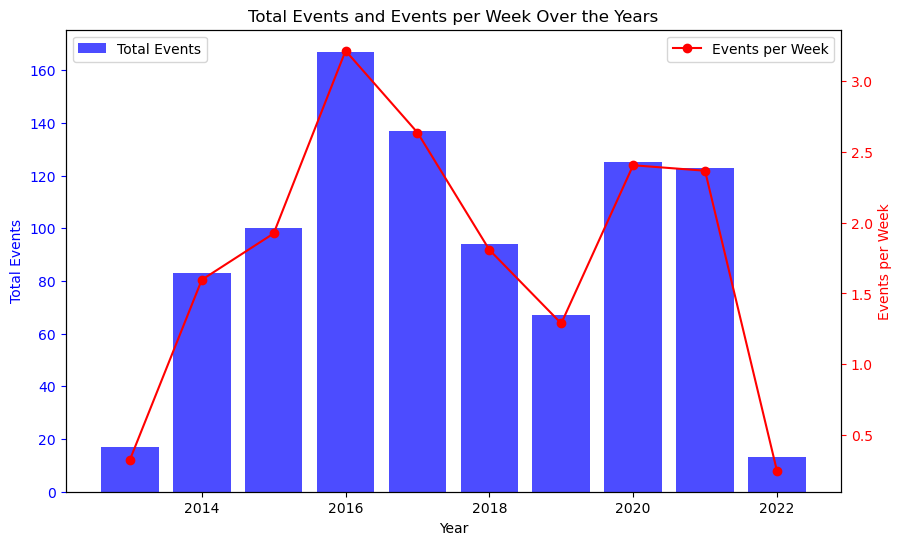

In [37]:
# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for Total Events
ax1.bar(events_per_year['Year'], events_per_year['Total Events'], color='b', alpha=0.7, label='Total Events')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Events', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the line graph
ax2 = ax1.twinx()

# Line graph for Events per Week
ax2.plot(events_per_year['Year'], events_per_year['Events per Week'], color='r', marker='o', label='Events per Week')
ax2.set_ylabel('Events per Week', color='r')
ax2.tick_params('y', colors='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title and labels
plt.title('Total Events and Events per Week Over the Years')
plt.xlabel('Year')

# Show the plot
plt.show()


###Average events per year

In [38]:
events_per_year = df_att['Year'].value_counts()
average_events_per_year = events_per_year.mean()

# Print the average number of events per year
print("Average Events per Year:", average_events_per_year)


Average Events per Year: 92.6


###Average events per week

In [39]:
# Calculate events per week
events_per_week = average_events_per_year / 52

# Print the result
print("Events per Week:", events_per_week)


Events per Week: 1.7807692307692307


#Macro Attendance Statistics

##Attendees per event

In [40]:
# Calculate average attendance per event (row)
average_attendance_per_event = df_att['Attendance'].mean()

# Calculate average attendance per event per year
average_attendance_per_event_per_year = df_att.groupby('Year')['Attendance'].mean()

# Print the results
print(f"Average Attendance per Event: {average_attendance_per_event}")
print("Average Attendance per Event per Year:")
print(average_attendance_per_event_per_year)


Average Attendance per Event: 7.568034557235421
Average Attendance per Event per Year:
Year
2013     7.647059
2014     9.108434
2015    10.300000
2016     6.251497
2017     6.540146
2018     5.648936
2019     8.656716
2020     7.712000
2021     7.894309
2022     8.153846
Name: Attendance, dtype: float64


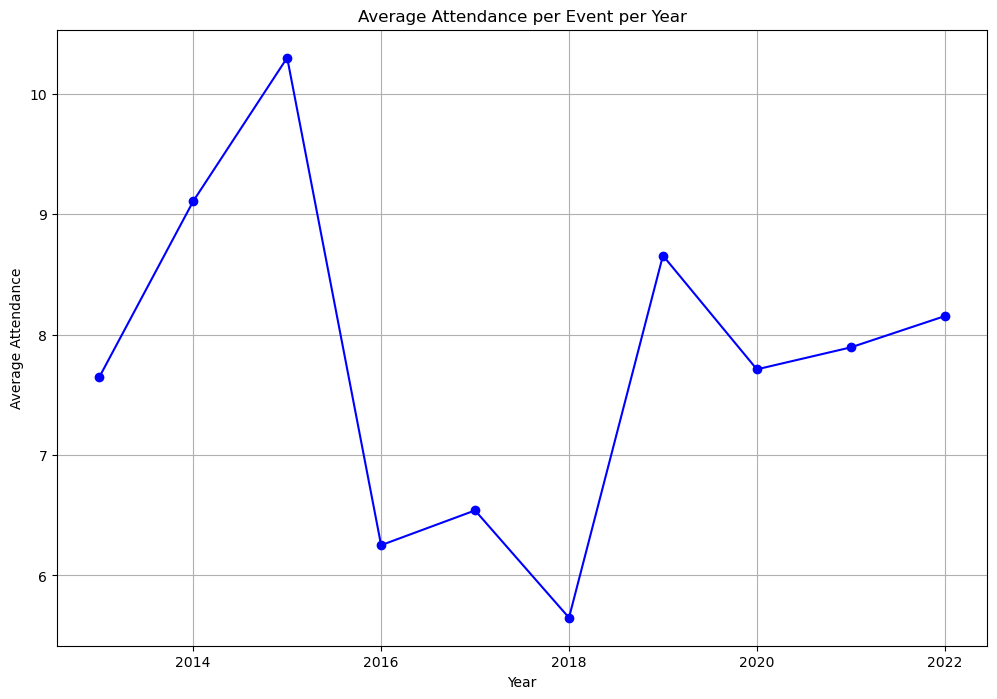

In [41]:
# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, marker='o', linestyle='-', color='b')
plt.title("Average Attendance per Event per Year")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.grid(True)

# Show the plot
plt.show()


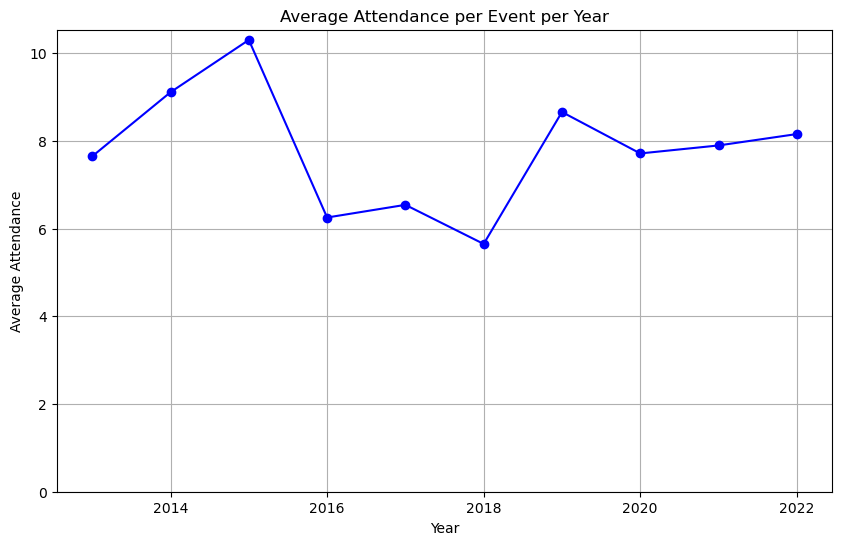

In [42]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, marker='o', linestyle='-', color='b')
plt.title("Average Attendance per Event per Year")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.ylim(0)  # Set the minimum y-value to start at 0
plt.grid(True)

# Show the plot
plt.show()


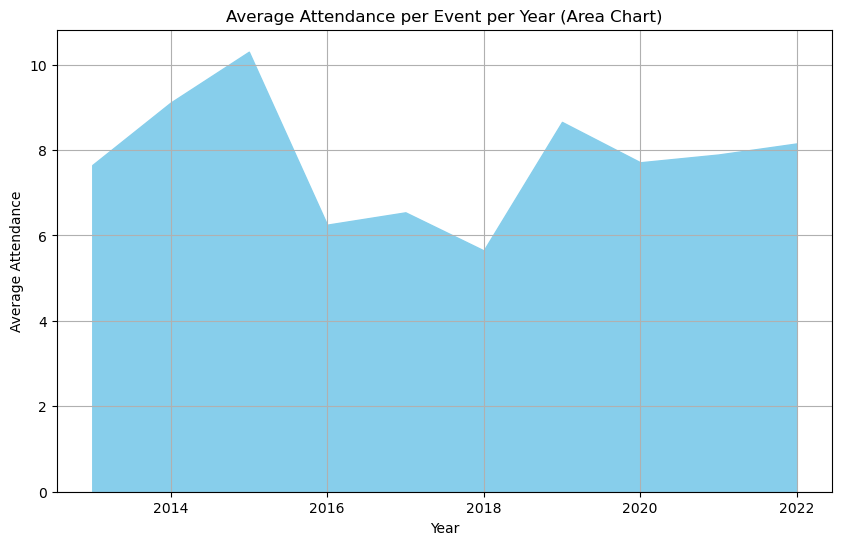

In [43]:
# Plot the data as an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, color='skyblue')
plt.title("Average Attendance per Event per Year (Area Chart)")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.ylim(0)  # Set the minimum y-value to start at 0
plt.grid(True)

# Show the plot
plt.show()


##Average Attendees per Type

In [44]:
average_attendance_per_type = df_att.groupby('Type')['Attendance'].mean()

# Print the results
print("Average Attendance per Type:")
print(average_attendance_per_type)


Average Attendance per Type:
Type
Administrative Function        10.750000
Championship                   16.153846
Clinic                          8.857143
Clinic/Game/Marketing Event    14.000000
Conditioning                    3.909091
Intra-Squad Game               18.263158
Skills Practice                 3.170543
Stringing                       5.000000
Team Building                   5.750000
Team Practice                   8.804270
Theory                          3.615385
Tournament                     14.800000
Training Camp                  10.500000
Name: Attendance, dtype: float64


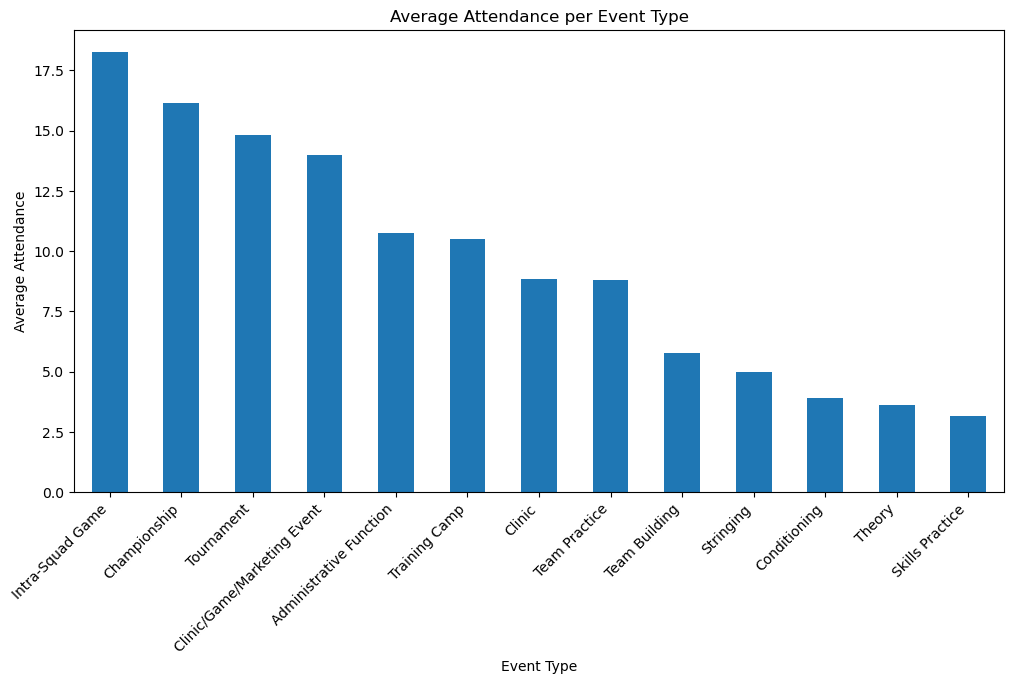

In [45]:
# Calculate average attendance per event type
average_attendance_per_type = df_att.groupby('Type')['Attendance'].mean()
average_attendance_per_type = average_attendance_per_type.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
average_attendance_per_type.plot(kind='bar')
plt.title('Average Attendance per Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha="right")
plt.show()


In [46]:
# Filter for Team Practice events
team_practice_df = df_att[df_att['Type'] == 'Team Practice']

# Calculate average attendance per Team Practice event per year
average_attendance_team_practice_per_year = team_practice_df.groupby('Year')['Attendance'].mean()

# Filter for Skills Practice events
skills_practice_df = df_att[df_att['Type'] == 'Skills Practice']

# Calculate average attendance per Skills Practice event per year
average_attendance_skills_practice_per_year = skills_practice_df.groupby('Year')['Attendance'].mean()

# Filter for Intra-Squad Game events
intra_squad_game_df = df_att[df_att['Type'] == 'Intra-Squad Game']

# Calculate average attendance per Intra-Squad Game event per year
average_attendance_intra_squad_game_per_year = intra_squad_game_df.groupby('Year')['Attendance'].mean()

# Filter for Championship events
championship_df = df_att[df_att['Type'] == 'Championship']

# Calculate average attendance per Championship event per year
average_attendance_championship_per_year = championship_df.groupby('Year')['Attendance'].mean()

# Filter for Tournament events
tournament_df = df_att[df_att['Type'] == 'Tournament']

# Calculate average attendance per Tournament event per year
average_attendance_tournament_per_year = tournament_df.groupby('Year')['Attendance'].mean()


In [47]:

# Print the results
print("Average Attendance per Team Practice per Year:")
print(average_attendance_team_practice_per_year)

print("Average Attendance per Skills Practice per Year:")
print(average_attendance_skills_practice_per_year)

print("Average Attendance per Intra-Squad Game per Year:")
print(average_attendance_intra_squad_game_per_year)

print("Average Attendance per Championship per Year:")
print(average_attendance_championship_per_year)

print("Average Attendance per Tournament per Year:")
print(average_attendance_tournament_per_year)


Average Attendance per Team Practice per Year:
Year
2013     7.647059
2014     8.014286
2015     9.192771
2016     7.469388
2017     9.800000
2018     8.187500
2019     9.553191
2020    11.285714
2021     8.645161
2022     8.153846
Name: Attendance, dtype: float64
Average Attendance per Skills Practice per Year:
Year
2016    2.745455
2017    2.520000
2018    3.709091
2019    3.285714
2020    3.650794
2021    2.904762
Name: Attendance, dtype: float64
Average Attendance per Intra-Squad Game per Year:
Year
2014    18.571429
2015    20.000000
2017    10.500000
2020    18.166667
2021    23.500000
Name: Attendance, dtype: float64
Average Attendance per Championship per Year:
Year
2014    11.500000
2015     8.000000
2016    19.000000
2017    22.000000
2018    15.500000
2019    15.666667
2020    17.000000
2021    21.500000
Name: Attendance, dtype: float64
Average Attendance per Tournament per Year:
Year
2014    14.00
2015    17.00
2016    14.20
2017    12.25
2018    11.00
2019    17.50
2020   

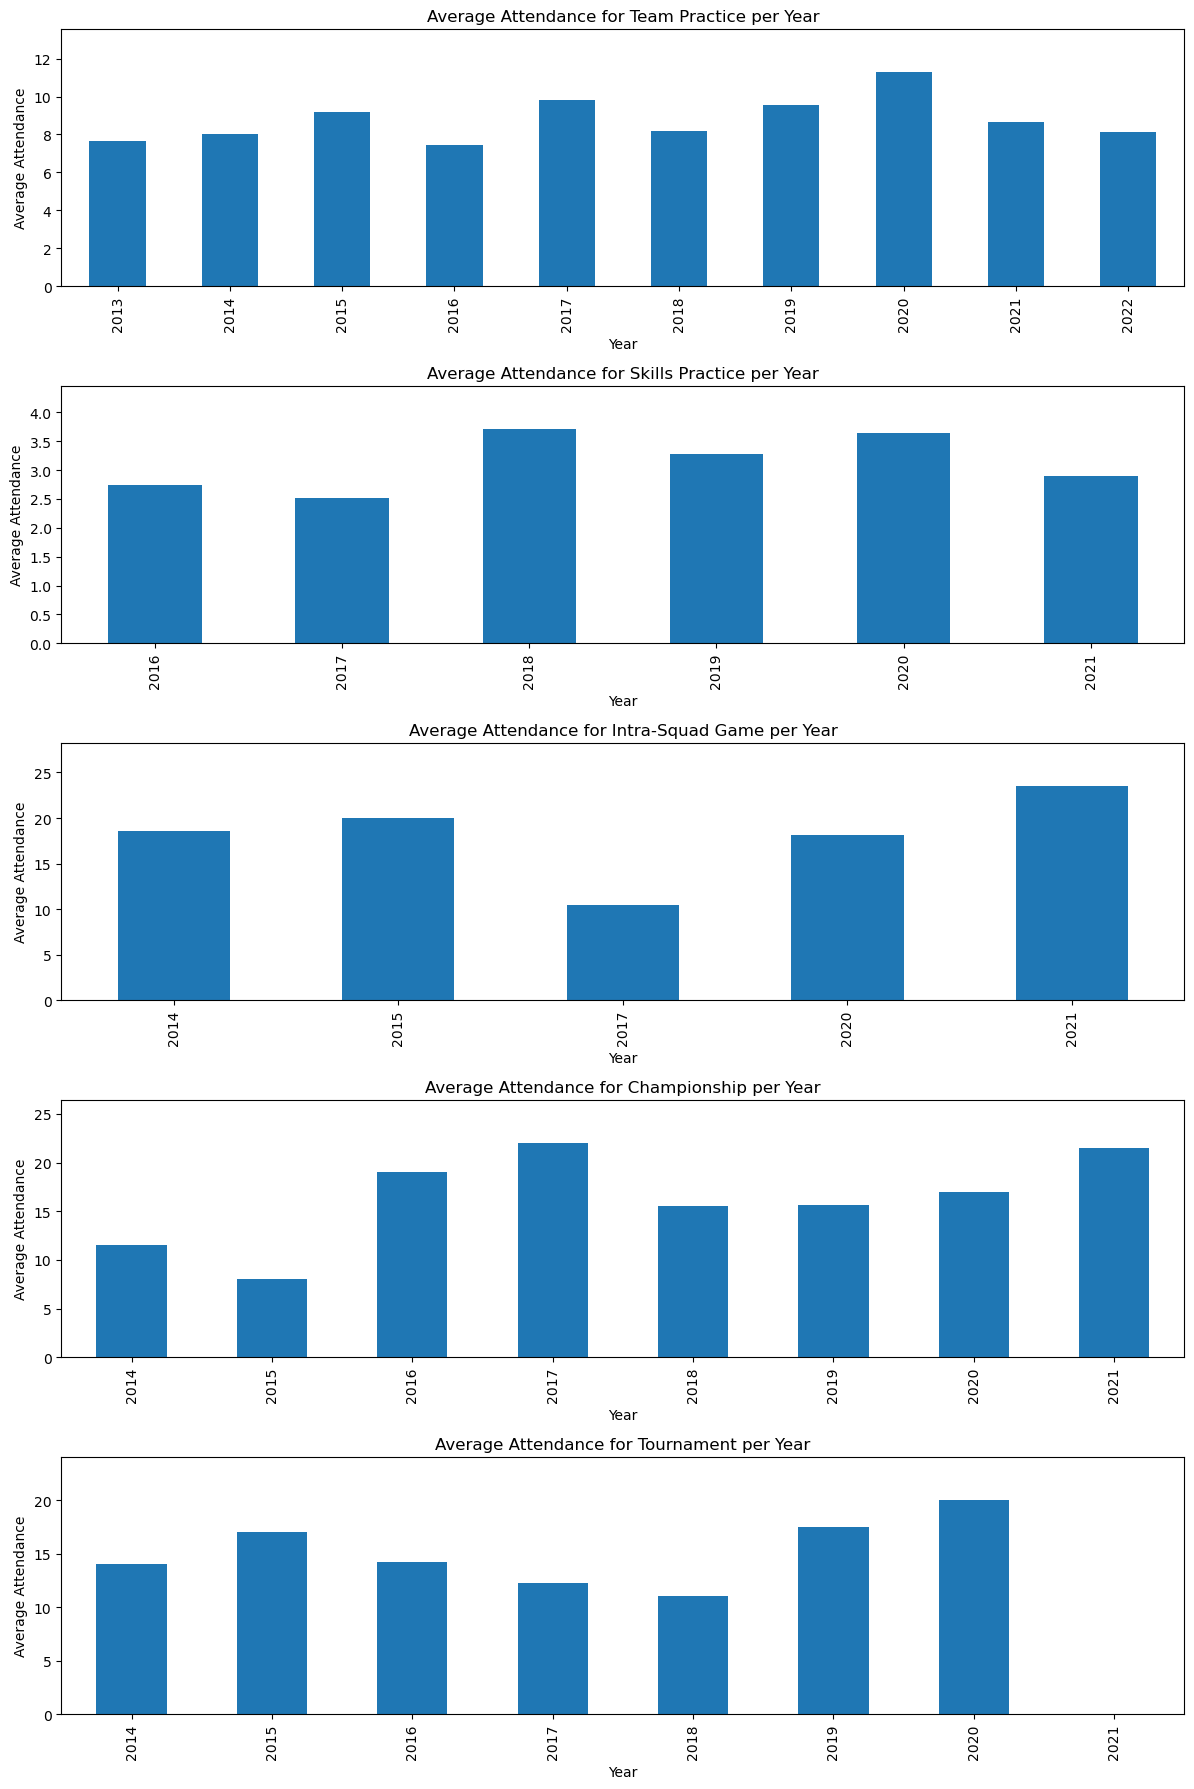

In [48]:

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 18))

# Plot Average Attendance per Event Type per Year
average_attendance_team_practice_per_year.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Attendance for Team Practice per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Attendance')
axes[0].set_ylim(0, max(average_attendance_team_practice_per_year) * 1.2)

average_attendance_skills_practice_per_year.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Attendance for Skills Practice per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Attendance')
axes[1].set_ylim(0, max(average_attendance_skills_practice_per_year) * 1.2)

average_attendance_intra_squad_game_per_year.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Attendance for Intra-Squad Game per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Attendance')
axes[2].set_ylim(0, max(average_attendance_intra_squad_game_per_year) * 1.2)

average_attendance_championship_per_year.plot(kind='bar', ax=axes[3])
axes[3].set_title('Average Attendance for Championship per Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Average Attendance')
axes[3].set_ylim(0, max(average_attendance_championship_per_year) * 1.2)

average_attendance_tournament_per_year.plot(kind='bar', ax=axes[4])
axes[4].set_title('Average Attendance for Tournament per Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Average Attendance')
axes[4].set_ylim(0, max(average_attendance_tournament_per_year) * 1.2)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


##Availability = time from first to last event attended

In [49]:
# List to store results
availability_days_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total time available for this attendee
    if len(attendee_events) > 0:
        start_date = attendee_events["Date_Date_Excel"].min()
        end_date = attendee_events["Date_Date_Excel"].max()
        total_days = (end_date - start_date).days

        availability_days_data.append([attendee, total_days])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_days_data, columns=["Name", "Availability"])

# Print the DataFrame
print(availability_df)


                     Name  Availability
0           Boroda Serhio            62
1                   Ее Ее          1253
2      Rowan Staden-Coats            35
3        Muhammad Ibrahim             0
4         Daniil Vlasenko          1743
..                    ...           ...
143          Даря Воршева             0
144  Tuyara Dayan-Pavlova           168
145        Artur Karibyan           203
146           Nick Ecvols          2442
147          Kenneth Wong            21

[148 rows x 2 columns]


In [50]:
# List to store results
availability_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total time available for this attendee
    if len(attendee_events) > 0:
        start_date = attendee_events["Date_Date_Excel"].min()
        end_date = attendee_events["Date_Date_Excel"].max()
        total_days = (end_date - start_date).days

        availability_data.append([attendee, total_days])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_data, columns=["Name", "Availability"])

# Print the DataFrame
print(availability_df)


                     Name  Availability
0           Boroda Serhio            62
1                   Ее Ее          1253
2      Rowan Staden-Coats            35
3        Muhammad Ibrahim             0
4         Daniil Vlasenko          1743
..                    ...           ...
143          Даря Воршева             0
144  Tuyara Dayan-Pavlova           168
145        Artur Karibyan           203
146           Nick Ecvols          2442
147          Kenneth Wong            21

[148 rows x 2 columns]


In [51]:
# List to store results
availability_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total number of attendee events
    total_attendee_events = len(attendee_events)

    # Calculate the first and last appearance
    first_appearance = attendee_events['Date_Date_Excel'].min()
    last_appearance = attendee_events['Date_Date_Excel'].max()

    # Filter the DataFrame to select rows where the event date is within the first and last appearance for the attendee
    possible_attendee_events = df_att[(df_att['Date_Date_Excel'] >= first_appearance) & (df_att['Date_Date_Excel'] <= last_appearance)]

    # Calculate the total number of possible attendee events
    total_possible_attendee_events = len(possible_attendee_events)

    availability_data.append([attendee, total_attendee_events, total_possible_attendee_events])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_data, columns=["Name", "Events_Attended", "Availability"])

# Print the DataFrame
print(availability_df)



                     Name  Events_Attended  Availability
0           Boroda Serhio                7            12
1                   Ее Ее                3           428
2      Rowan Staden-Coats                4             9
3        Muhammad Ibrahim                1             1
4         Daniil Vlasenko               62           544
..                    ...              ...           ...
143          Даря Воршева                1             1
144  Tuyara Dayan-Pavlova                4            37
145        Artur Karibyan                4            29
146           Nick Ecvols              133           782
147          Kenneth Wong                3             4

[148 rows x 3 columns]


##Availablitity + Events Attended + (Total Events Attended/Availability)

In [52]:
# Add a new column for the percentage of events attended
availability_df["Attendance_Percentage"] = (availability_df["Events_Attended"] / availability_df["Availability"]) * 100

# Print the DataFrame with the new column
print(availability_df)


                     Name  Events_Attended  Availability  \
0           Boroda Serhio                7            12   
1                   Ее Ее                3           428   
2      Rowan Staden-Coats                4             9   
3        Muhammad Ibrahim                1             1   
4         Daniil Vlasenko               62           544   
..                    ...              ...           ...   
143          Даря Воршева                1             1   
144  Tuyara Dayan-Pavlova                4            37   
145        Artur Karibyan                4            29   
146           Nick Ecvols              133           782   
147          Kenneth Wong                3             4   

     Attendance_Percentage  
0                58.333333  
1                 0.700935  
2                44.444444  
3               100.000000  
4                11.397059  
..                     ...  
143             100.000000  
144              10.810811  
145              1

In [53]:
# Sort the DataFrame by "Attendance_Percentage" in descending order
sorted_availability_df = availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print the sorted DataFrame
print(sorted_availability_df)


                    Name  Events_Attended  Availability  Attendance_Percentage
91        Viktor Bukanov                1             1             100.000000
59          Evgen Soltys                1             1             100.000000
66            Philipp Le                1             1             100.000000
69         Борис Ремизов                1             1             100.000000
25    Leonid Belokopytov                1             1             100.000000
..                   ...              ...           ...                    ...
78         Андрей Потеха                5           404               1.237624
117       George Rusinov                7           570               1.228070
132            Ildar Isa                5           415               1.204819
43   Татьяна Стародубова                4           344               1.162791
1                  Ее Ее                3           428               0.700935

[148 rows x 4 columns]


In [54]:
# Filter the DataFrame to include only rows with 10 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 10]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print the sorted and filtered DataFrame
print(sorted_filtered_availability_df)


                    Name  Events_Attended  Availability  Attendance_Percentage
23       Eugene Arkhipov              699           795              87.924528
50                Kn Yaz              151           244              61.885246
35   Анастасия Кухтерина               10            17              58.823529
37      Алексей Чернышов               10            18              55.555556
48      Valeria Surikova               35            69              50.724638
..                   ...              ...           ...                    ...
13   Konstantin Kravtsov               26           603               4.311774
11  Konstantin Kologriev               28           772               3.626943
83    Nikita Konogorskiy               11           304               3.618421
61    Valeriy Severukhin               21           685               3.065693
64         Дмитрий Засов               10           401               2.493766

[66 rows x 4 columns]


In [138]:
# Filter the DataFrame to include only rows with 5 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 5]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print only the "Name" and "Attendance_Percentage" columns
print(sorted_filtered_availability_df[["Name", "Attendance_Percentage"]])


                    Name  Attendance_Percentage
23       Eugene Arkhipov              87.924528
76         Ivan Baranoff              75.000000
42        Ruslan Romanov              75.000000
50                Kn Yaz              61.885246
35   Анастасия Кухтерина              58.823529
..                   ...                    ...
64         Дмитрий Засов               2.493766
135        Chase Philpot               1.396648
78         Андрей Потеха               1.237624
117       George Rusinov               1.228070
132            Ildar Isa               1.204819

[92 rows x 2 columns]


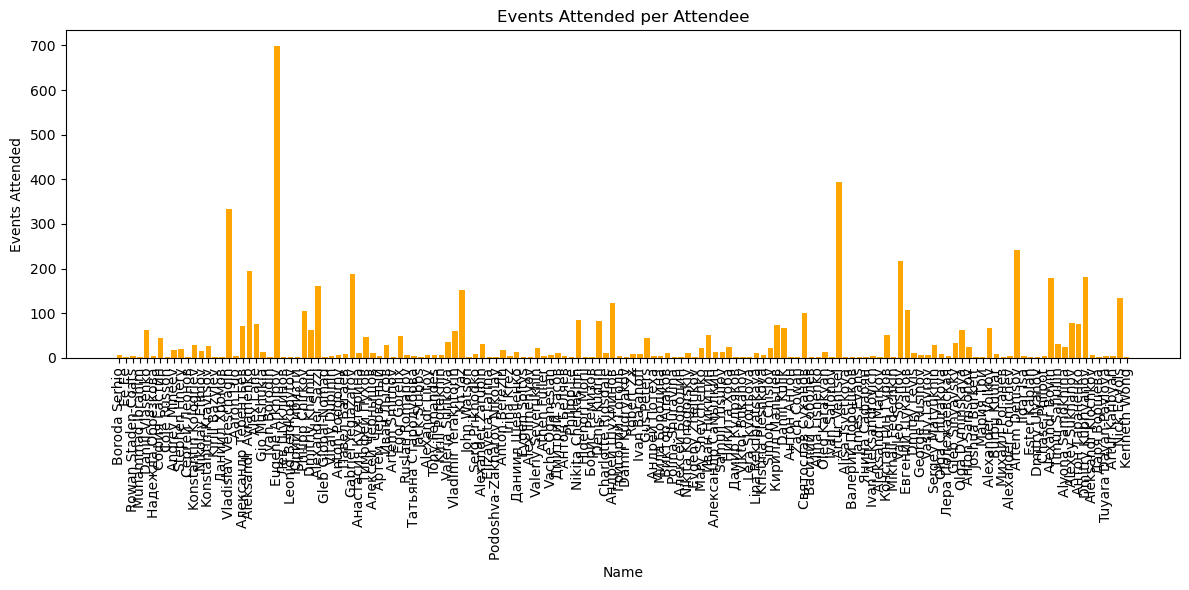

In [126]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for Events_Attended
plt.bar(availability_df['Name'], availability_df['Events_Attended'], color='orange')

# Customize the plot
plt.xlabel('Name')
plt.ylabel('Events Attended')
plt.title('Events Attended per Attendee')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


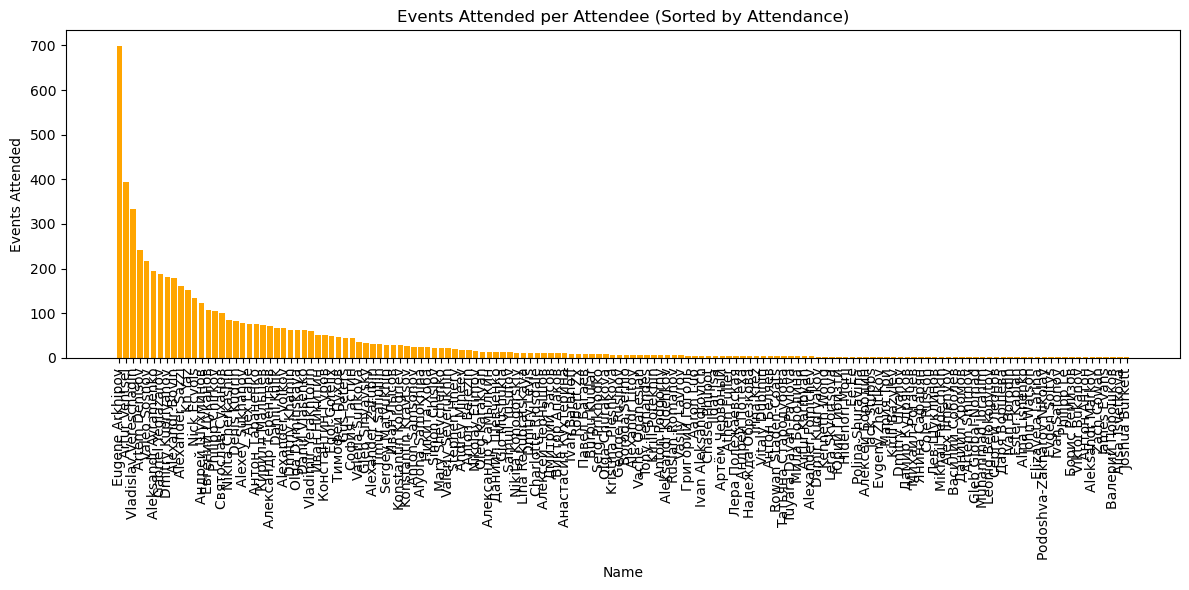

In [127]:
# Sort the DataFrame by Events Attended in descending order
sorted_availability_df = availability_df.sort_values(by='Events_Attended', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for Events Attended
plt.bar(sorted_availability_df['Name'], sorted_availability_df['Events_Attended'], color='orange')

# Customize the plot
plt.xlabel('Name')
plt.ylabel('Events Attended')
plt.title('Events Attended per Attendee (Sorted by Attendance)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



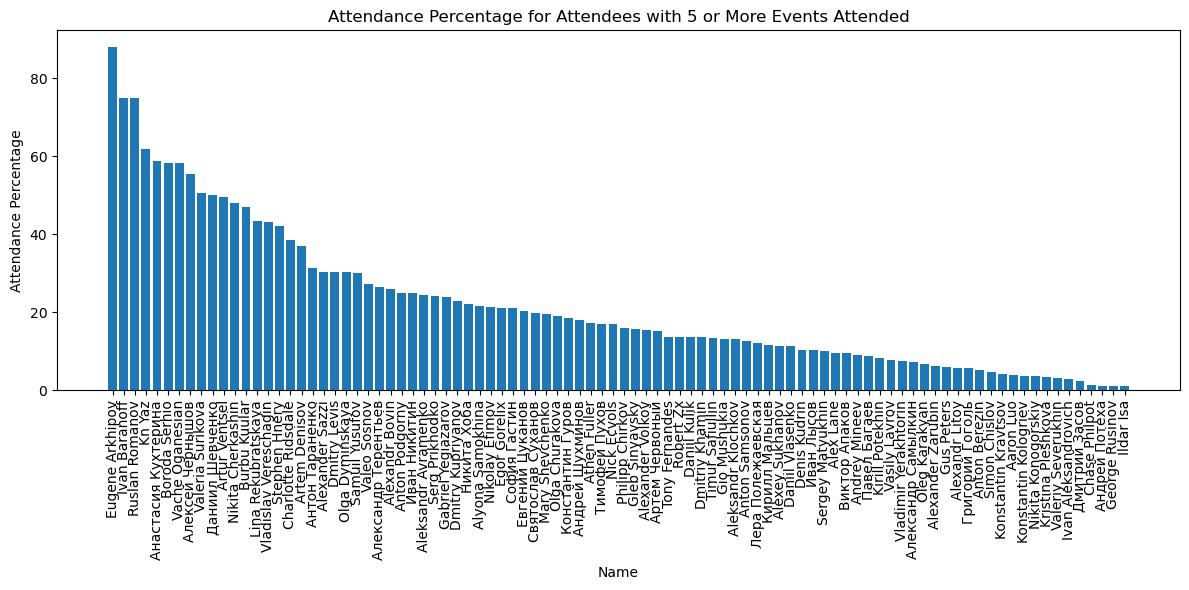

In [143]:
# Filter the DataFrame to include only rows with 5 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 5]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_filtered_availability_df["Name"], sorted_filtered_availability_df["Attendance_Percentage"])
plt.xlabel("Name")
plt.ylabel("Attendance Percentage")
plt.title("Attendance Percentage for Attendees with 5 or More Events Attended")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


###Same result, different code

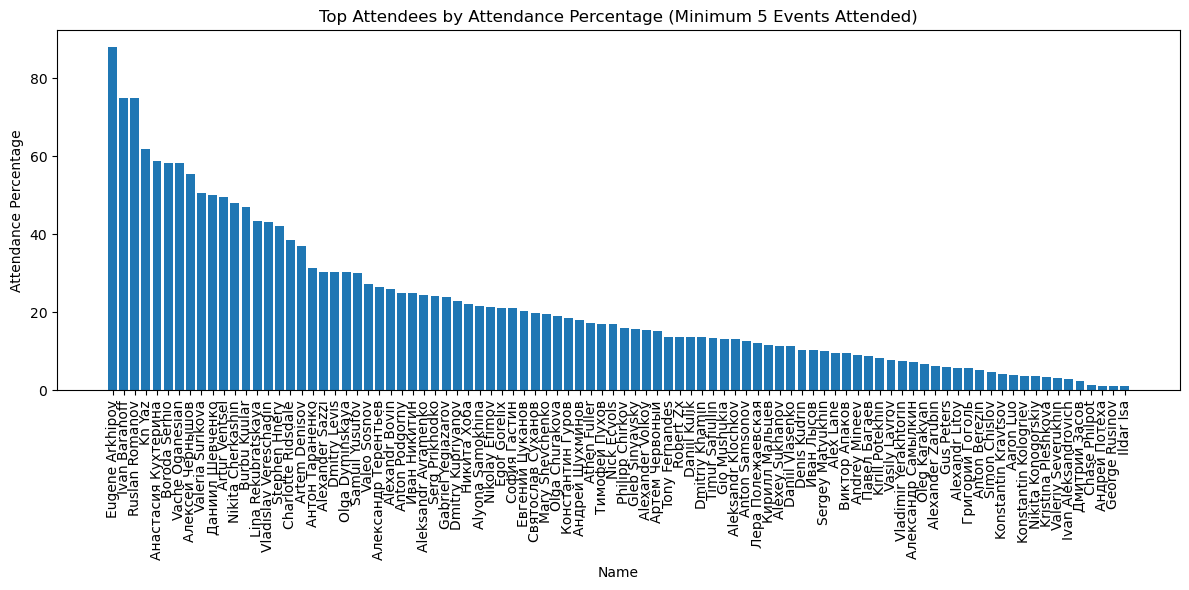

In [149]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(sorted_filtered_availability_df["Name"], sorted_filtered_availability_df["Attendance_Percentage"])

# Set labels and title
plt.xlabel("Name")
plt.ylabel("Attendance Percentage")
plt.title("Top Attendees by Attendance Percentage (Minimum 5 Events Attended)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


#Eugene Arkhipov Personal Attendance Statistics

In [130]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Sample duration values from the filtered DataFrame
eugene_durations = eugene_events['Duration']

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in eugene_durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration for events where Eugene Arkhipov was present
print(f"Total Duration for Eugene Arkhipov's Events: {total_hours} hr {remaining_minutes} min")



Total Duration for Eugene Arkhipov's Events: 2073 hr 39 min


##Artur Test

In [131]:
# Filter the DataFrame to select rows where Artur Ventsel is in the "Going" column
artur_events = df_att[df_att['Going'].str.contains('Artur Ventsel', case=False)]

# Sample duration values from the filtered DataFrame
artur_durations = artur_events['Duration']

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in artur_durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration for events where Artur Ventsel was present
print(f"Total Duration for Artur Ventsel's Events: {total_hours} hr {remaining_minutes} min")

Total Duration for Artur Ventsel's Events: 1263 hr 9 min


##Event names count attended by Eugene

In [132]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Count the number of occurrences of each unique event
event_counts = eugene_events['Name'].value_counts()

# Print the counts of each event
print("Events Eugene Arkhipov Attended:")
print(event_counts)


Events Eugene Arkhipov Attended:
Академия Лакросса                                      258
Тренировка в воскресенье                                62
Тренировка (суб вечер)                                  59
Тренировка на поляне                                    54
Тренировка (вос днем)                                   52
                                                      ... 
Функциональный тренинг в Сокольниках                     1
Лакросс на Днем Спорта в Сокольниках. Часть вторая.      1
Тренировка в Субботу                                     1
Днем На Поляне                                           1
Пробная игра на новом поле                               1
Name: Name, Length: 96, dtype: int64


##Event Types count attended by Eugene

In [133]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Count the number of occurrences of each unique event type
type_counts = eugene_events['Type'].value_counts()

# Print the counts of each event type
print("Event Types Eugene Arkhipov Attended:")
print(type_counts)


Event Types Eugene Arkhipov Attended:
Team Practice                  382
Skills Practice                258
Theory                          13
Tournament                      12
Intra-Squad Game                10
Championship                     6
Clinic                           5
Clinic/Game/Marketing Event      3
Stringing                        3
Conditioning                     2
Administrative Function          2
Training Camp                    2
Team Building                    1
Name: Type, dtype: int64


##Events Attended by Eugene per year

In [134]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Group the filtered DataFrame by the "Year" column and count the occurrences
events_per_year = eugene_events['Year'].value_counts().sort_index()

# Print the count of events attended by Eugene Arkhipov each year
print("Events Attended by Eugene Arkhipov Each Year:")
print(events_per_year)


Events Attended by Eugene Arkhipov Each Year:
2015     51
2016    127
2017    115
2018     91
2019     61
2020    119
2021    122
2022     13
Name: Year, dtype: int64


##Event types attended by Eugene each year

In [135]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Group the filtered DataFrame by the "Year" column and count the total occurrences
events_per_year = eugene_events['Year'].value_counts().sort_index()

# Filter the DataFrame to select rows with "Team Practice" events attended by Eugene
team_practice_events = eugene_events[eugene_events['Type'] == 'Team Practice']

# Group the filtered "Team Practice" DataFrame by the "Year" column and count the occurrences
team_practice_per_year = team_practice_events['Year'].value_counts().sort_index()

# Filter the DataFrame to select rows with "Skills Practice" events attended by Eugene
skills_practice_events = eugene_events[eugene_events['Type'] == 'Skills Practice']

# Group the filtered "Skills Practice" DataFrame by the "Year" column and count the occurrences
skills_practice_per_year = skills_practice_events['Year'].value_counts().sort_index()

# Filter the main DataFrame (df_att) to select rows where Eugene Arkhipov is in the "Going" column
other_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False, na=False)]

# Exclude "Skills Practice" and "Team Practice" events
other_events = other_events[~other_events['Type'].isin(['Skills Practice', 'Team Practice'])]

# Group the "Other Events" DataFrame by the "Year" column and count the occurrences
other_events_per_year = other_events['Year'].value_counts().sort_index()

# Merge all the Series to create a DataFrame with all the information
result = pd.DataFrame({'Total Events Attended': events_per_year, 'Team Practice Attended': team_practice_per_year, 'Skills Practice Attended': skills_practice_per_year, 'Other Events Attended': other_events_per_year})
result.fillna(0, inplace=True)  # Fill NaN values with 0

# Print the result
print("Events Attended by Eugene Arkhipov Each Year:")
print(result)


Events Attended by Eugene Arkhipov Each Year:
      Total Events Attended  Team Practice Attended  Skills Practice Attended  \
2015                     51                      44                       0.0   
2016                    127                      61                      55.0   
2017                    115                      47                      50.0   
2018                     91                      31                      55.0   
2019                     61                      46                      14.0   
2020                    119                      47                      63.0   
2021                    122                      93                      21.0   
2022                     13                      13                       0.0   

      Other Events Attended  
2015                    7.0  
2016                   11.0  
2017                   18.0  
2018                    5.0  
2019                    1.0  
2020                    9.0  
2021          

##Events attended by Eugene by month

In [136]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)].copy()

# Convert the "Date_Date_Excel" column to datetime objects
eugene_events["Date_Date_Excel"] = pd.to_datetime(eugene_events["Date_Date_Excel"])

# Extract the month from the "Date_Date_Excel" column and create a new "Month" column
eugene_events['Month'] = eugene_events["Date_Date_Excel"].dt.month

# Group the DataFrame by month and count the total occurrences
events_per_month = eugene_events['Month'].value_counts().sort_index()

# Print the breakdown of events attended by Eugene Arkhipov for each month
print("Events Attended by Eugene Arkhipov Each Month:")
print(events_per_month)


Events Attended by Eugene Arkhipov Each Month:
1     27
2     38
3     51
4     58
5     80
6     76
7     74
8     83
9     77
10    60
11    35
12    40
Name: Month, dtype: int64
